# Exploratory Data Analysis

The main objectives for this notebook are:
- Perform univariate analysis
- Investigate the relationships between features
- Highlight insights that can inform the stakeholders' decisions
- Go through the next steps that will be used in feature engineering and machine learning

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv('../data/Iranian_churn_cleaned.csv')
df

,call_fails,complained,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,tariff_plan,status,age,cust_value,churn
0,8,False,38,0,4370,71,5,17,Prepaid,Active,30,197.640,False
1,0,False,39,0,318,5,7,4,Prepaid,Inactive,25,46.035,False
2,10,False,37,0,2453,60,359,24,Prepaid,Active,30,1536.520,False
3,10,False,38,0,4198,66,1,35,Prepaid,Active,15,240.020,False
4,3,False,38,0,2393,58,2,33,Prepaid,Active,15,145.805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,False,19,2,6697,147,92,44,Contractual,Active,25,721.980,False
3146,17,False,17,1,9237,177,80,42,Prepaid,Active,55,261.210,False
3147,13,False,18,4,3157,51,38,21,Prepaid,Active,30,280.320,False
3148,7,False,11,2,4695,46,222,12,Prepaid,Active,30,1077.640,False


Additional variable information:
- call_fails: number of call failures
- complained: bool (0: No complaint, 1: complaint)
- sub_length: total months of subscription
- charge_amt: Ordinal attribute (0: lowest amount, 9: highest amount)
- seconds_used: total seconds of calls
- usage_freq: total number of calls
- sms_freq: total number of text messages
- unique_contacts_called: total number of distinct phone calls
- tariff_plan: categorical (1: Pay as you go, 2: contractual)
- status: categorical (1: active, 2: non-active)
- churn: bool (1: churn, 0: non-churn) - Class label
- cust_value: The calculated value of customer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   call_fails              3150 non-null   int64  
 1   complained              3150 non-null   bool   
 2   sub_length              3150 non-null   int64  
 3   charge_amt              3150 non-null   int64  
 4   seconds_used            3150 non-null   int64  
 5   usage_freq              3150 non-null   int64  
 6   sms_freq                3150 non-null   int64  
 7   unique_contacts_called  3150 non-null   int64  
 8   tariff_plan             3150 non-null   object 
 9   status                  3150 non-null   object 
 10  age                     3150 non-null   int64  
 11  cust_value              3150 non-null   float64
 12  churn                   3150 non-null   bool   
dtypes: bool(2), float64(1), int64(8), object(2)
memory usage: 277.0+ KB


In [6]:
df.describe()

,call_fails,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,age,cust_value
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,30.998413,470.972916
std,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,8.831095,517.015433
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,25.000000,113.801250
50%,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,30.000000,228.480000
75%,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,30.000000,788.388750
max,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000


In [7]:
# Predefine figsize
figsize1_1 = (8,4)
figsize1_2 = (16, 5)

0   call_fails

1   complained

2   sub_length

3   charge_amt

4   seconds_used

5   usage_freq

6   sms_freq

7   unique_contacts_called

8   tariff_plan

9   status

10  age

11  cust_value

12  churn

# Univariate analysis

In [30]:
def draw_mean_median(dataframe):
    """
    Function for drawing a mean and median line.
    Arg: df['column']
    """
    plt.axvline(x=np.mean(dataframe),
            color='red')
    plt.axvline(x=np.median(dataframe),
            color='green',
            ls='--',
            lw=1.5)

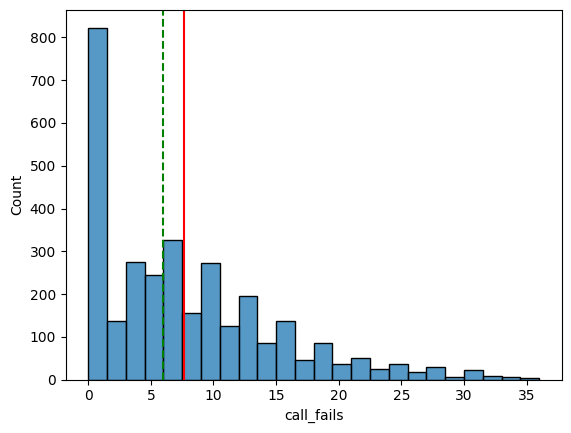

In [31]:
sns.histplot(x='call_fails', data=df)
draw_mean_median(df['call_fails'])

This looks like a log-normal distribution.

<Axes: xlabel='complained', ylabel='count'>

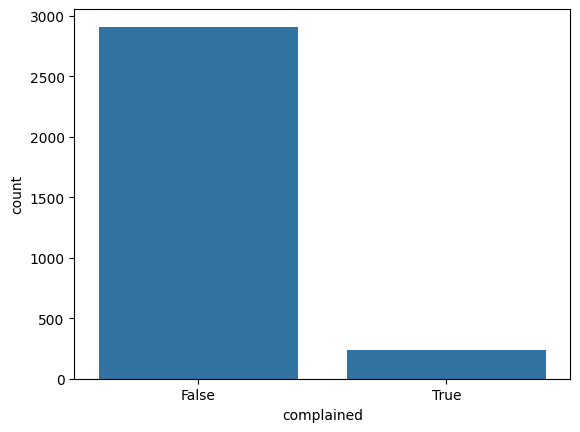

In [32]:
sns.countplot(x='complained', data=df)

32.54190476190476
35.0


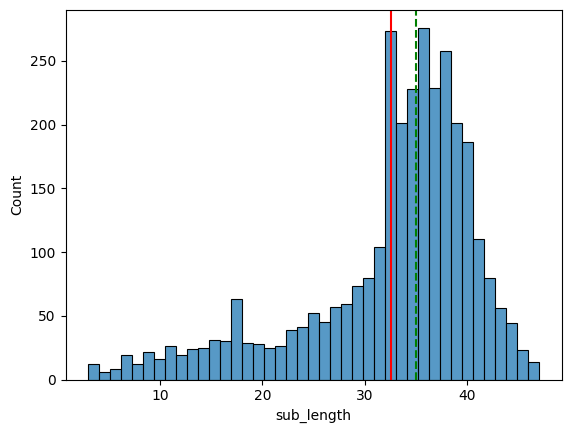

In [33]:
sns.histplot(x='sub_length', data=df)

draw_mean_median(df['sub_length'])

print(np.mean(df['sub_length']))
print(np.median(df['sub_length']))

<Axes: xlabel='charge_amt', ylabel='Count'>

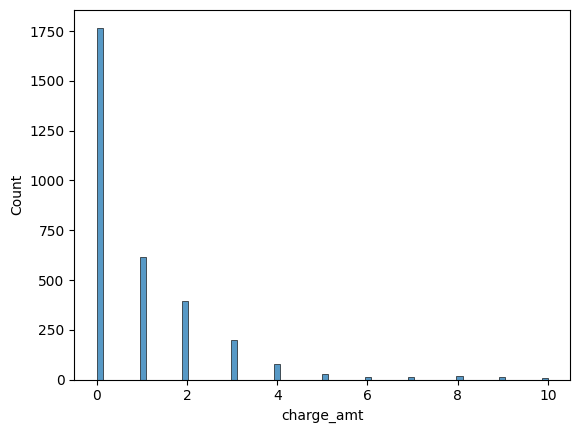

In [34]:
sns.histplot(x='charge_amt', data=df)

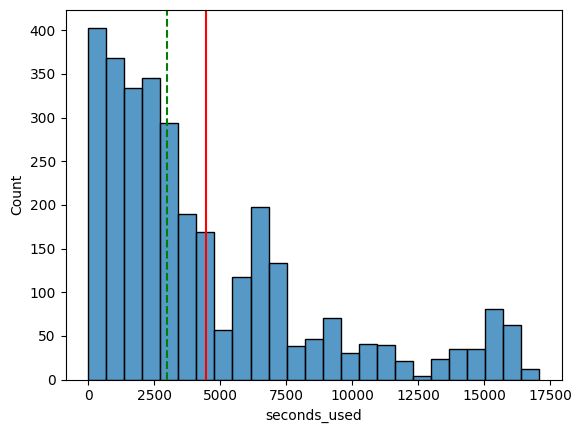

In [35]:
sns.histplot(x='seconds_used', data=df)

draw_mean_median(df['seconds_used'])


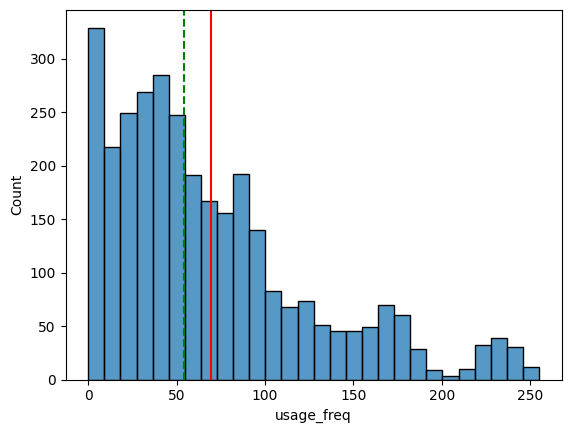

In [36]:
sns.histplot(x='usage_freq', data=df)

draw_mean_median(df['usage_freq'])


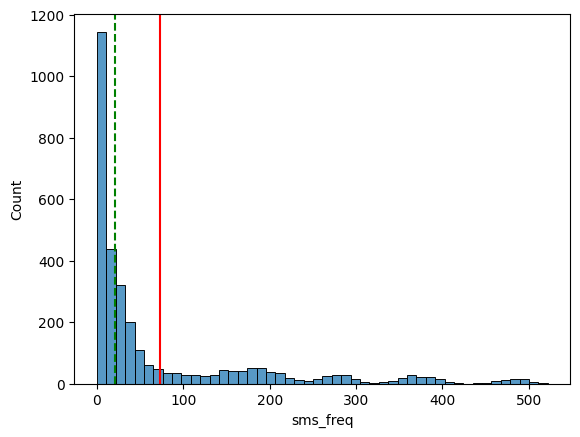

In [37]:
sns.histplot(x='sms_freq', data=df)

draw_mean_median(df['sms_freq'])


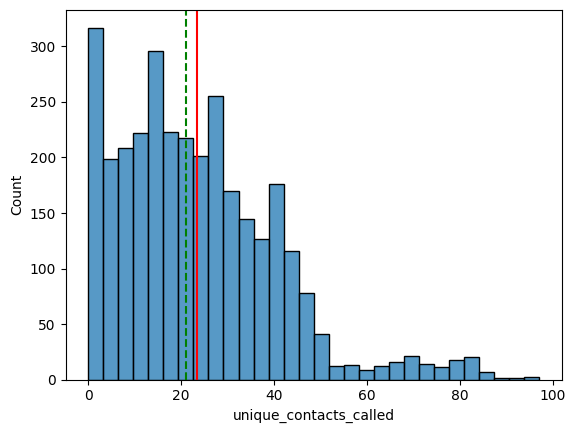

In [38]:
sns.histplot(x='unique_contacts_called', data=df)

draw_mean_median(df['unique_contacts_called'])


<Axes: xlabel='tariff_plan', ylabel='count'>

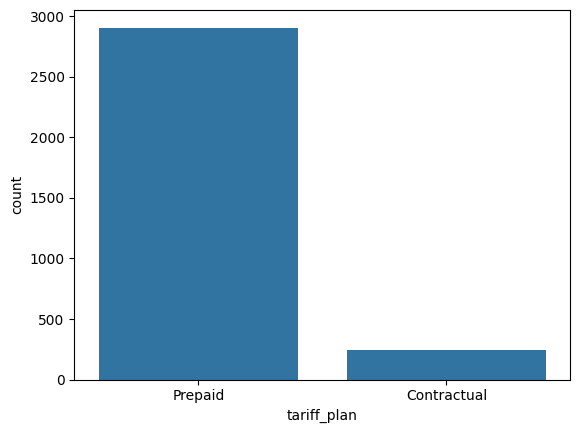

In [39]:
sns.countplot(x='tariff_plan', data=df)

<Axes: xlabel='status', ylabel='count'>

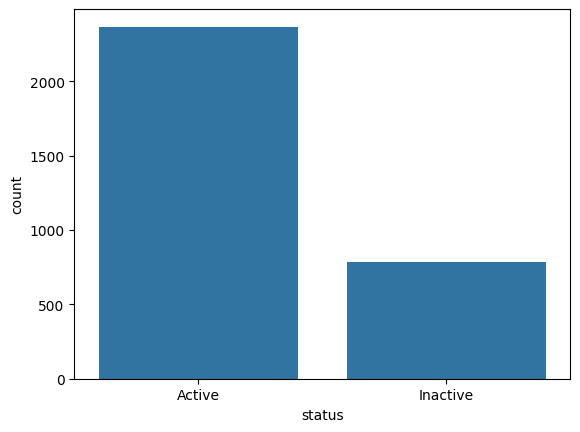

In [40]:
sns.countplot(x='status', data=df)

<Axes: xlabel='age', ylabel='count'>

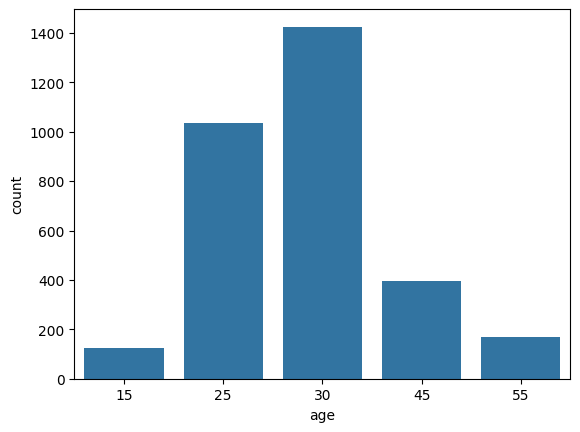

In [43]:
sns.countplot(x='age', data=df)

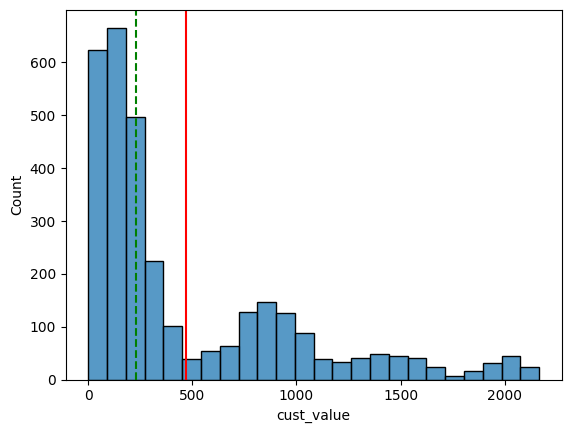

In [44]:
sns.histplot(x='cust_value', data=df)

draw_mean_median(df['cust_value'])

<Axes: xlabel='churn', ylabel='count'>

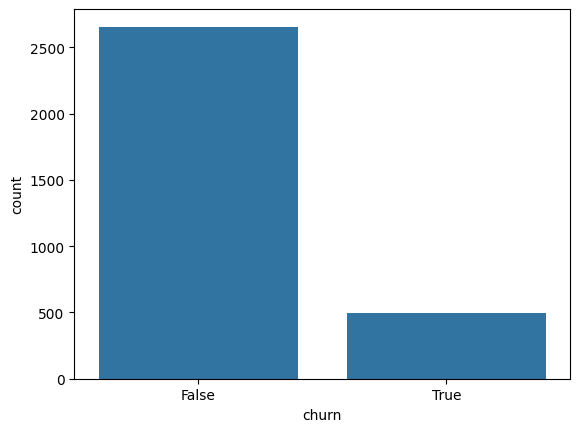

In [45]:
sns.countplot(x='churn', data=df)